In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv(r'C:\Users\aa\PyCharmMiscProject\Tiktok_analysis\tiktok_dataset_.csv', sep=';')

In [126]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,0,7017666017,59,someone shared with me that drone deliveries a...,0,2,343296,19425,241,1,0
1,2,0,4014381136,32,someone shared with me that there are more mic...,0,0,140877,77355,19034,1161,684
2,3,0,9859838091,31,someone shared with me that american industria...,0,0,902185,97690,2858,833,329
3,4,0,1866847991,25,someone shared with me that the metro of st. p...,0,0,437506,239954,34812,1234,584
4,5,0,7105231098,19,someone shared with me that the number of busi...,0,0,56167,34987,4110,547,152


In [ ]:
data.info()

In [ ]:
data.describe()

In [120]:
data.shape

(19084, 12)

In [ ]:
data.isnull().sum()

In [ ]:
data['verified_status'].value_counts()

In [ ]:
data['claim_status'].value_counts()

Data Preprocessing

	Identify missing values (NaN) in the dataset.

	Decide on a strategy to handle them (e.g., filling with mean/median/mode, forward/backward filling, or dropping rows/columns).


In [ ]:
print(data['claim_status'].isnull())

In [ ]:
data['claim_status'].value_counts(dropna=False)

In [ ]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

In [ ]:
null_values = data.isnull()
print(null_values)

In [ ]:
null_summary = data.isnull().sum().reset_index()
null_summary.columns = ['Column', 'MissingValues']
null_summary['Percentage'] = (null_summary['MissingValues'] / len(data)) * 100

print(data['claim_status'].dtype)

Total missing values by column

Rows with missing values

Percentage of missing values by column




In [ ]:
print("Total missing values by column:")
print(data.isnull().sum())

print("\nRows with missing values:")
print(data[data.isnull().any(axis=1)])

print("\nPercentage of missing values by column:")
print((data.isnull().sum() / len(data)) * 100)

In [ ]:
# Drop all rows with null values
data = data.dropna()
print("Shape of the DataFrame after dropping rows with null values:", data.shape)

rows_with_null = data[data.isnull().any(axis=1)]
print(rows_with_null)

In [ ]:
data.isnull().sum()

	Check for and remove any duplicate rows to ensure that each entry is unique.

In [ ]:
data.nunique()

In [ ]:
data.duplicated()

In [ ]:
duplicates = data[data.duplicated()]
print(duplicates)

In [127]:
data.drop('video_transcription_text', axis=1, inplace=True)


	Identify and handle outliers in numerical columns like views, likes, comments, etc., using methods such as the IQR method or Z-score.


In [ ]:
# Calculate the IQR for numerical columns
numerical_columns = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count']
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Shape before removing outliers:", data.shape)
data = data[~((data[numerical_columns] < lower_bound) | (data[numerical_columns] > upper_bound)).any(axis=1)]
print("Shape after removing outliers:", data.shape)

	Convert categorical variables like verified_status, author_ban_status, etc., into binary or dummy variables if needed for modeling.

In [ ]:
data.head()

In [117]:
categorical_columns = data.select_dtypes(include=['object','category']).columns
print("________________Categorical columns________________________")
print(categorical_columns)

________________Categorical columns________________________
Index(['claim_status', 'video_transcription_text', 'verified_status',
       'author_ban_status'],
      dtype='object')


One Hot Encoding (OHE)

In [119]:
columns_to_dummy = ['claim_status', 'verified_status', 'author_ban_status']

dummy_data = pd.get_dummies(data, columns=columns_to_dummy, drop_first=True)

# Compare
print("New dummy columns data shape", dummy_data.shape)
print("Dummy column names", dummy_data.columns)


New dummy columns data shape (19084, 13)
Dummy column names Index(['#', 'video_id', 'video_duration_sec', 'video_transcription_text',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count', 'claim_status_opinion',
       'verified_status_verified', 'author_ban_status_banned',
       'author_ban_status_under review'],
      dtype='object')


In [122]:
dummy_data.head()

,#,video_id,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,7017666017,59,someone shared with me that drone deliveries a...,343296,19425,241,1,0,False,False,False,True
1,2,4014381136,32,someone shared with me that there are more mic...,140877,77355,19034,1161,684,False,False,False,False
2,3,9859838091,31,someone shared with me that american industria...,902185,97690,2858,833,329,False,False,False,False
3,4,1866847991,25,someone shared with me that the metro of st. p...,437506,239954,34812,1234,584,False,False,False,False
4,5,7105231098,19,someone shared with me that the number of busi...,56167,34987,4110,547,152,False,False,False,False


Data Transformation

	Prepare data for machine learning (encoding categorical variables, scaling numeric features)

Label Encoding process

In [123]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['claim_status', 'verified_status', 'author_ban_status']

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

print("Label Encoded sütun başlıkları:", data[categorical_columns].head())


Label Encoded sütun başlıkları:    claim_status  verified_status  author_ban_status
0             0                0                  2
1             0                0                  0
2             0                0                  0
3             0                0                  0
4             0                0                  0


In [128]:
data.head()

,#,claim_status,video_id,video_duration_sec,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,0,7017666017,59,0,2,343296,19425,241,1,0
1,2,0,4014381136,32,0,0,140877,77355,19034,1161,684
2,3,0,9859838091,31,0,0,902185,97690,2858,833,329
3,4,0,1866847991,25,0,0,437506,239954,34812,1234,584
4,5,0,7105231098,19,0,0,56167,34987,4110,547,152


Modeling

	Split data into training and testing sets

	Try different algorithms (e.g., Logistic Regression, Random Forest, Gradient Boosting)


In [129]:
from sklearn.model_selection import train_test_split

X = data.drop('claim_status', axis=1)
y = data['claim_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (15267, 10)
X_test shape: (3817, 10)
y_train shape: (15267,)
y_test shape: (3817,)


In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search= GridSearchCV(
    RandomForestClassifier(random_state=42),param_grid=param_grid,
    cv=3
)
grid_search.fit(X_train, y_train)

print("The best parametrs:", grid_search.best_params_)

The best parametrs: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

	Evaluate models using appropriate metrics (accuracy, precision, recall, F1-score)

In [136]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Ek performans metrikleri
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9979041131778884
Confusion Matrix:
 [[1920    8]
 [   0 1889]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1928
           1       1.00      1.00      1.00      1889

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



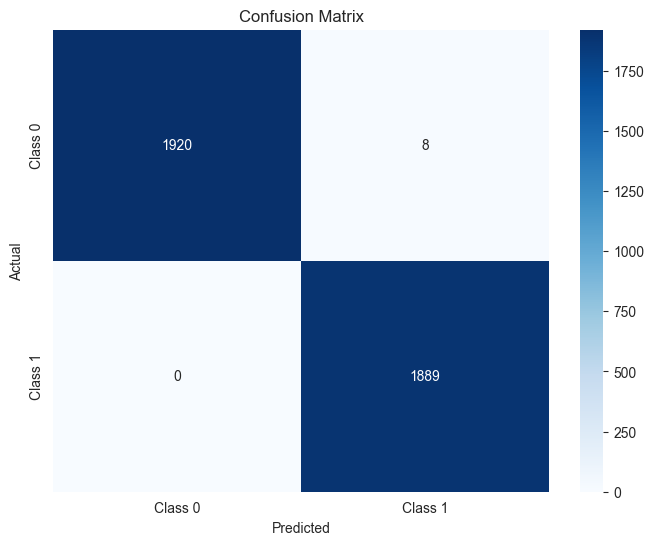

In [137]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
